In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\syeda\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [46]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title):
    width=12
    height=10
    fig=plt.figure(figsize=(width,height))
    
    ax1=sns.distplot(RedFunction,hist=False,color="r",label=RedName)
    ax2=sns.distplot(BlueFunction,hist=False,color="b",label=BlueName,ax=ax1)
    plt.title(Title)
    plt.xlabel("price in dollars")
    plt.ylabel("proportion of cars")
    plt.show()
    plt.close()

In [84]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    

In [8]:
y_data = df['price']

In [9]:
x_data=df.drop('price',axis=1)

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.40,random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 81
number of training samples: 120


In [12]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lre.score(x_test[['horsepower']], y_test)

0.6111827529454427

In [14]:
lre.score(x_train[['horsepower']], y_train)

0.6755325771980133

In [15]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 21
number of training samples: 180


In [16]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train1[['horsepower']], y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lre.score(x_test1[['horsepower']], y_test1)

0.3635875575078824

In [18]:
lre.score(x_train1[['horsepower']], y_train1)

0.6619724197515103

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [23]:
cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([-20254142.84026704, -43745493.2650517 , -12539630.34014931,
       -17561927.72247591])

In [24]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [25]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

In [33]:
rc=cross_val_score(lre,x_data[["horsepower"]],y_data,cv=2)
rc.mean()

0.5166761697127429

In [34]:
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lre,x_data[["horsepower"]],y_data,cv=2)

In [35]:
yhat[0:5]

array([13577.7162064 , 13577.7162064 , 19353.86646699, 12368.75452396,
       14115.03250972])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
Lr=LinearRegression()
Lr.fit(x_train[['horsepower', 'curb-weight','engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
yhat_train=Lr.predict(x_train[['horsepower', 'curb-weight','engine-size', 'highway-mpg']])

In [41]:
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

In [42]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

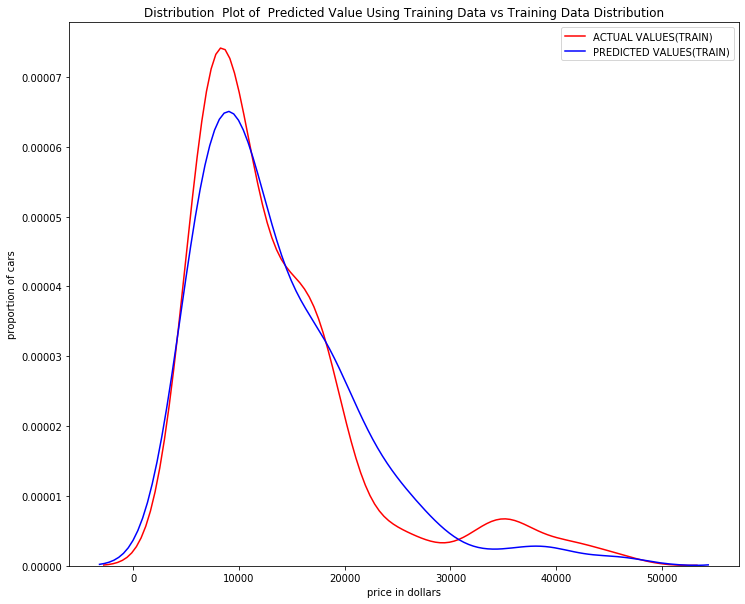

In [47]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train,yhat_train,"ACTUAL VALUES(TRAIN)","PREDICTED VALUES(TRAIN)",Title)

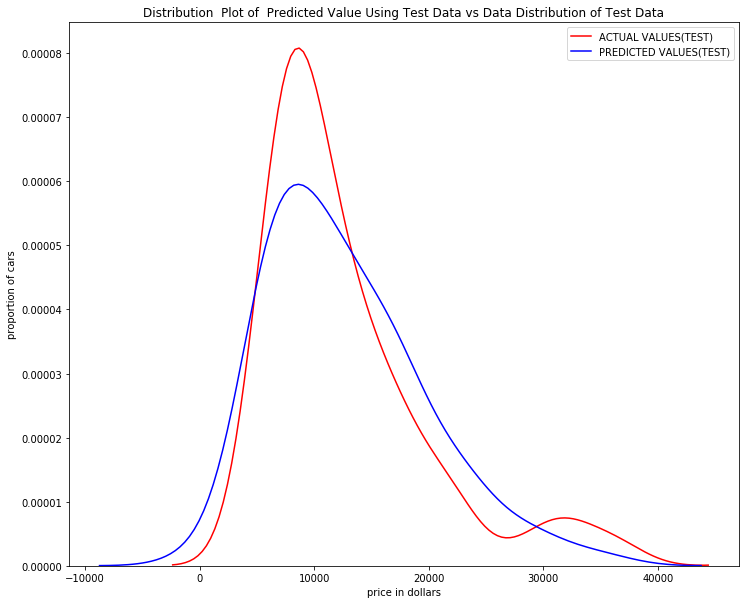

In [48]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"ACTUAL VALUES(TEST)","PREDICTED VALUES(TEST)",Title)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [70]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[["horsepower"]])
x_test_pr=pr.fit_transform(x_test[["horsepower"]])

In [71]:
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [72]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
yhat=poly.predict(x_train_pr)

In [74]:
yhat[0:5]

array([13157.91334016, 21890.67003319,  6409.63339229, 21231.60727688,
        7905.4463452 ])

In [75]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [13157.91334016 21890.67003319  6409.63339229 21231.60727688]
True values: [ 6295. 10698. 13860. 13499.]


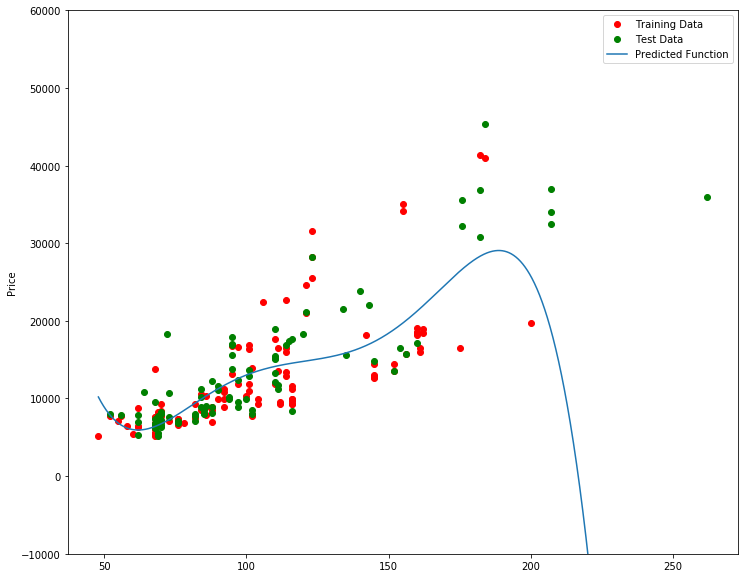

In [85]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [86]:
poly.score(x_train_pr, y_train)

0.5567716902635091

In [87]:
poly.score(x_test_pr, y_test)

-29.87141885918752

Text(3, 0.75, 'Maximum R^2 ')

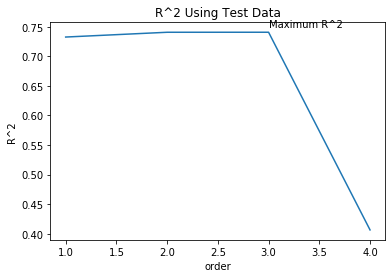

In [91]:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[["horsepower"]])
    x_test_pr=pr.fit_transform(x_test[["horsepower"]])
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [92]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [93]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [94]:
pr1=PolynomialFeatures(degree=2)

In [95]:
#ridge regression

In [96]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [97]:
from sklearn.linear_model import Ridge

In [99]:
RigeModel=Ridge(alpha=0.1)

In [102]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\syeda\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
yhat = RigeModel.predict(x_test_pr)

In [104]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [106]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

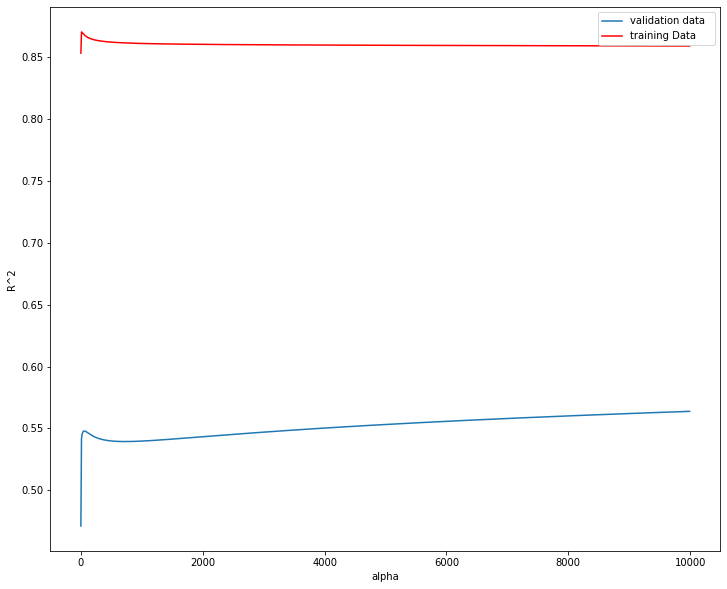

In [107]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [110]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [113]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

C:\Users\syeda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149